# Análise de funcionários da IBM

## Importação de bibliotecas e arquivo

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
file=pd.read_csv("ibm_att.csv")

## Limpeza dos dados

**Checando valores duplicados e valores nulos**

In [50]:
file.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
file.duplicated().sum()

0

In [52]:
file.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Removendo colunas que possuem um único valor, pois não irão acrescentar muito na analise**

In [53]:
unique_cols=file.nunique()==1
unique_cols=unique_cols[unique_cols].index.tolist()
file=file.drop(columns=unique_cols)


## Análise exploratória

In [54]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### Distribuição por gênero

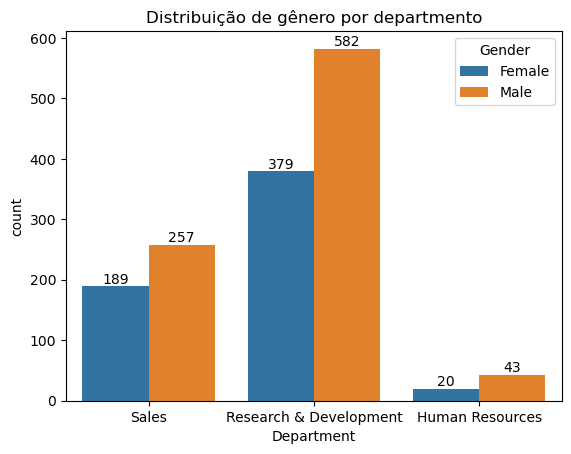

In [55]:
fig1_1=sns.countplot(data=file,x=file['Department'],hue=file['Gender'])
fig1_1.set_title("Distribuição de gênero por departmento")
fig1_1.bar_label(fig1_1.containers[0]);
fig1_1.bar_label(fig1_1.containers[1]);

##### Distribuição de cargo por gênero 

In [56]:
pd.crosstab(file['JobRole'],file['Gender'])

Gender,Female,Male
JobRole,,
Healthcare Representative,51,80
Human Resources,16,36
Laboratory Technician,85,174
Manager,47,55
Manufacturing Director,72,73
Research Director,33,47
Research Scientist,114,178
Sales Executive,132,194
Sales Representative,38,45


##### Distribuição de formação por gênero

In [57]:
pd.crosstab(file['EducationField'],file['Gender']).sort_values(['Male','Female'],ascending=False)

Gender,Female,Male
EducationField,,
Life Sciences,240,366
Medical,190,274
Marketing,69,90
Technical Degree,52,80
Other,29,53
Human Resources,8,19


##### Distribuição de nível educacional por gênero 

###### TRADUÇÃO DE RÓTULOS:

###### 'Below College' : Sem faculdade
###### 'College'= Faculdade
###### 'Bachelor'= Bacharel
###### 'Master' = Mestre
###### 'Doctor' = Doutor 

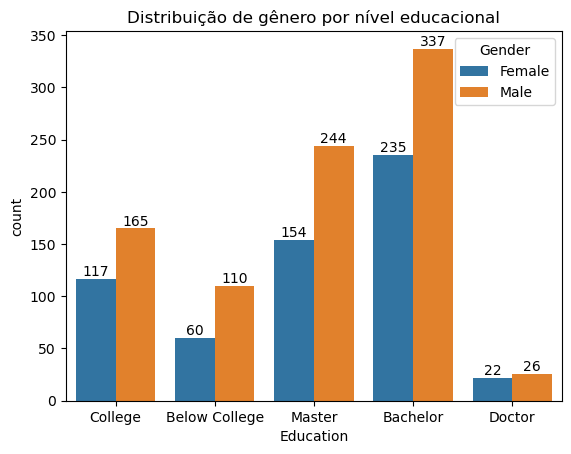

In [58]:
fig1_2=sns.countplot(data=file,x=file['Education'].replace({
1:'Below College',
2:'College',
3:'Bachelor',
4:'Master',
5:'Doctor'}),
hue=file['Gender'])

fig1_2.set_title("Distribuição de gênero por nível educacional")
fig1_2.bar_label(fig1_2.containers[0]);
fig1_2.bar_label(fig1_2.containers[1]);

### Distribuição por média salarial

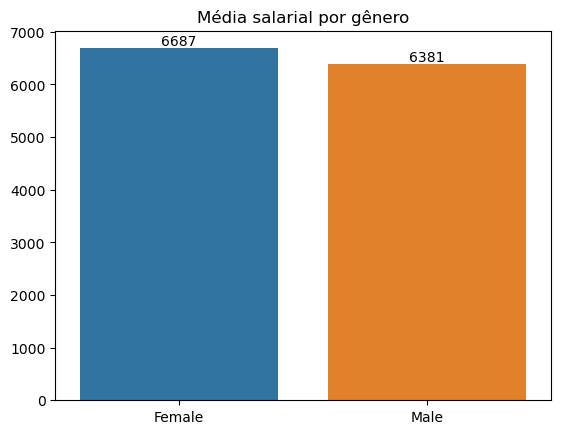

In [59]:
avg_income_gender=file.groupby('Gender')['MonthlyIncome'].mean().round().reset_index()   
fig2_1=sns.barplot(data=avg_income_gender,x='Gender',y='MonthlyIncome');
fig2_1.set_title("Média salarial por gênero");
fig2_1.set_ylabel("")
fig2_1.set_xlabel("")
fig2_1.bar_label(fig2_1.containers[0]);

#### Por departamento

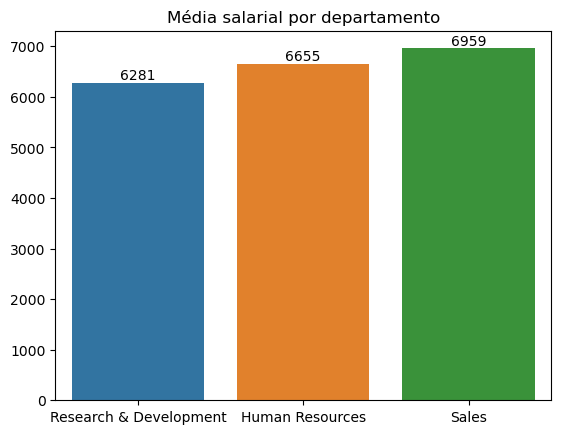

In [60]:
avg_income_dep=file.groupby('Department')['MonthlyIncome'].mean().round().reset_index().sort_values('MonthlyIncome')
fig2_2=sns.barplot(data=avg_income_dep,x='Department',y='MonthlyIncome');
fig2_2.set_title("Média salarial por departamento");
fig2_2.set_ylabel("")
fig2_2.set_xlabel("")
fig2_2.bar_label(fig2_2.containers[0]);

#### Média salarial por nível de cargo / cargo

##### Cargos com maior média salarial

In [61]:
avg_income_jobs=file.groupby(['JobLevel','JobRole'])['MonthlyIncome'].mean().round().sort_values(ascending=False).reset_index()

avg_income_jobs.head(5)

,JobLevel,JobRole,MonthlyIncome
0,5,Research Director,19205.0
1,5,Manager,19184.0
2,4,Manager,16613.0
3,4,Research Director,16429.0
4,4,Manufacturing Director,13383.0


**Cargos de diretoria/gerencia são os mais bem renumerados**

##### Cargos com menor média salarial

In [62]:
avg_income_jobs.tail(5)

,JobLevel,JobRole,MonthlyIncome
21,2,Sales Representative,3921.0
22,1,Laboratory Technician,2855.0
23,1,Research Scientist,2828.0
24,1,Human Resources,2733.0
25,1,Sales Representative,2507.0


**Cargos voltados para vendas e recursos humanos possuem a menor media salarial**

#### Média salarial por nível educacional

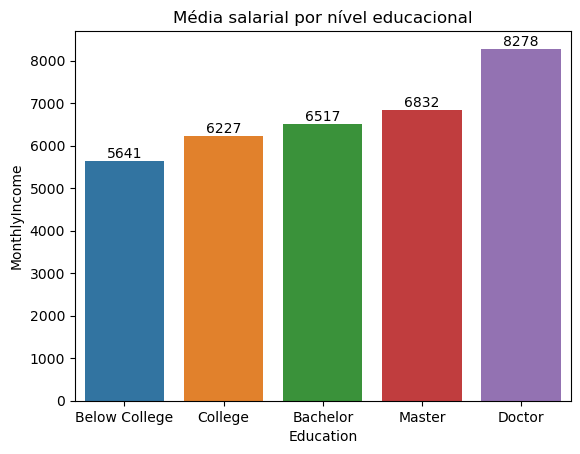

In [63]:
avg_income_ed=file.groupby('Education')['MonthlyIncome'].mean().round().reset_index().sort_values('MonthlyIncome').replace({
1:'Below College',
2:'College',
3:'Bachelor',
4:'Master',
5:'Doctor'})
fig2_3=sns.barplot(data=avg_income_ed,x='Education',y='MonthlyIncome');
fig2_3.set_title("Média salarial por nível educacional");
fig2_3.bar_label(fig2_3.containers[0]);

**O salário tende a crescer conforme o nível educacional, a diferença é considerável entre um mestre e doutor**

#### Média salarial por faixa etária

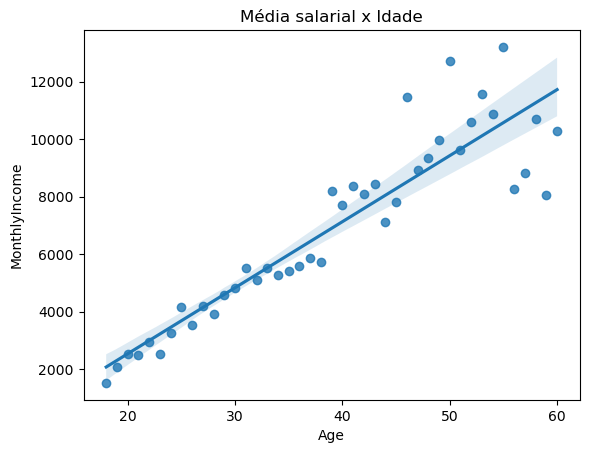

In [64]:
avg_income_age=file.groupby('Age')['MonthlyIncome'].mean().round().sort_values(ascending=False).reset_index()
sns.regplot(data=avg_income_age,x='Age',y='MonthlyIncome').set_title('Média salarial x Idade');

**Há uma relação linear positiva entre esses dois fatores**

### Analisando funcionários que sairam / permaneceram na empresa (Yes = saiu, No= permaneceu)

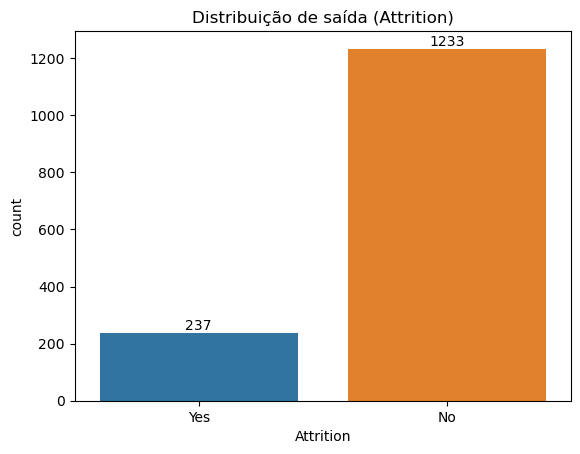

In [65]:
fig3=sns.countplot(data=file,x=file['Attrition']);
fig3.set_title("Distribuição de saída (Attrition)");
fig3.bar_label(fig3.containers[0]);

**Dos 1470 funcionários analisados, 237 fazem parte do grupo de pessoas que sairam da empresa, isso corresponde a 16%**

#### Por gênero

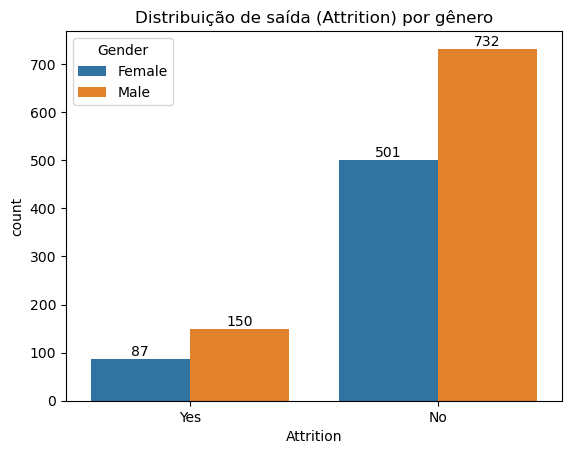

In [66]:
fig4=sns.countplot(data=file,x=file['Attrition'],hue=file['Gender']);
fig4.set_title("Distribuição de saída (Attrition) por gênero");
fig4.bar_label(fig4.containers[0]);
fig4.bar_label(fig4.containers[1]);

#### Por departamento

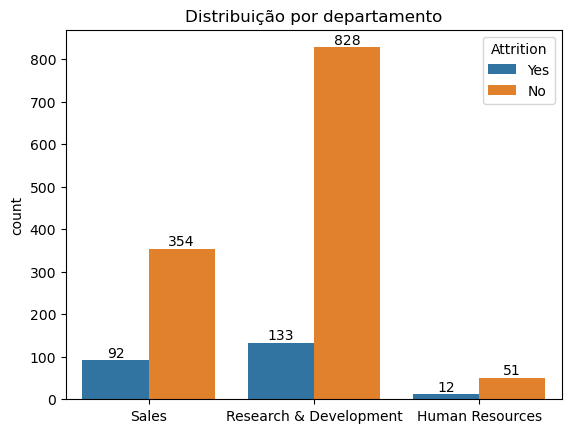

In [67]:
fig5=sns.countplot(data=file,x=file['Department'],hue=file['Attrition']);
fig5.bar_label(fig5.containers[0]);
fig5.bar_label(fig5.containers[1]);
fig5.set_xlabel("")
fig5.set_title("Distribuição por departamento");


**56% dessas saídas são do departamento de pequisa e desenvolvimento,38% do departamento de vendas e 12% do departamento de recursos humanos**

#### Comparando o número de saidas por nível de cargo / cargo 

In [68]:
att_job=pd.crosstab(file['JobRole'],file['Attrition']).sort_values('Yes',ascending=False)
att_job

Attrition,No,Yes
JobRole,,
Laboratory Technician,197,62
Sales Executive,269,57
Research Scientist,245,47
Sales Representative,50,33
Human Resources,40,12
Manufacturing Director,135,10
Healthcare Representative,122,9
Manager,97,5
Research Director,78,2


#### Comparando média salarial dos funcionários que sairam e permaneceram

In [69]:
pd.pivot_table(data=file,index='JobRole',columns='Attrition',values='MonthlyIncome',aggfunc='mean').round().sort_values('Yes')

Attrition,No,Yes
JobRole,,
Sales Representative,2798.0,2365.0
Research Scientist,3328.0,2780.0
Laboratory Technician,3337.0,2919.0
Human Resources,4392.0,3716.0
Manufacturing Director,7290.0,7366.0
Sales Executive,6805.0,7489.0
Healthcare Representative,7454.0,8548.0
Manager,17201.0,16797.0
Research Director,15947.0,19396.0


**Existe uma diferença considerável da média salarial entre funcionários que sairam e ficaram, sendo esse, um fator de peso para saidas**


### Há casos onde os funcionários que sairam possuiam um salário médio maior: Research Director, Manufacturing Director, Sales executives e Healthcare Representative

#### TRADUÇÃO DE RÓTULOS:

##### 'Low' = Baixo
##### 'Medium' = Médio
##### 'High'= Alto
##### 'Very High' = Muito alto

##### 'Bad' = Ruim
##### 'Good' = Bom
##### 'Better'= Melhor
##### 'Best' = Muito bom

#### Analisando saidas no cargo 'Research director' (Diretor de pesquisa)


In [70]:
RD_att=file.query("JobRole=='Research Director' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion']]
RD_att

,DistanceFromHome,JobInvolvement,WorkLifeBalance,EnvironmentSatisfaction,JobSatisfaction,YearsInCurrentRole,YearsSinceLastPromotion
45,12,3,3,2,3,15,15
595,2,3,3,4,2,15,13


**Um funcionário possuia satisfação média com ambiente e estava no mesmo cargo por 15 anos**


**Um fucionário possuia satisfação média no cargo e estava a 15 anos na mesma posição**

#### Analisando saídas no cargo 'Manufacturing Director' (Diretor de manufatura)

In [71]:
MD_att=file.query("JobRole=='Manufacturing Director' and Attrition=='Yes'")[['DistanceFromHome','Age','WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion']]
MD_att

,DistanceFromHome,Age,WorkLifeBalance,EnvironmentSatisfaction,JobSatisfaction,YearsInCurrentRole,YearsSinceLastPromotion
136,8,51,3,1,4,2,0
192,23,35,3,2,3,0,0
250,10,37,3,1,3,0,0
666,3,22,4,2,3,2,0
966,7,58,2,3,1,9,5
985,22,31,2,4,3,2,6
1033,1,31,3,3,2,8,4
1111,2,53,3,3,4,7,1
1112,2,38,3,3,2,2,1
1291,10,37,1,4,1,3,0


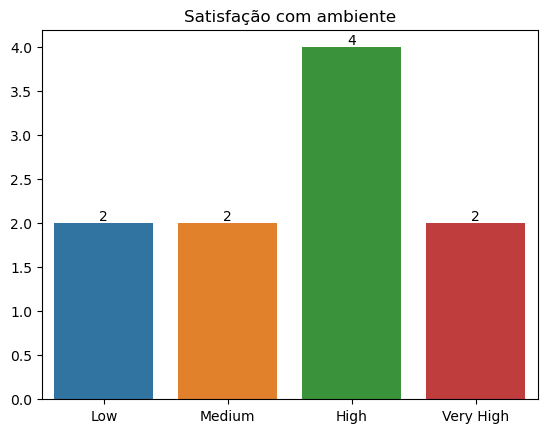

In [72]:
figMD_att=sns.countplot(data=MD_att,x=MD_att['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
figMD_att.set_title("Satisfação com ambiente")
figMD_att.set_ylabel("")
figMD_att.set_xlabel("")
figMD_att.bar_label(figMD_att.containers[0]);


**Cerca de 70% apresentou satisfação alta/muito alta, enquanto que 30% apresentou baixa/média**

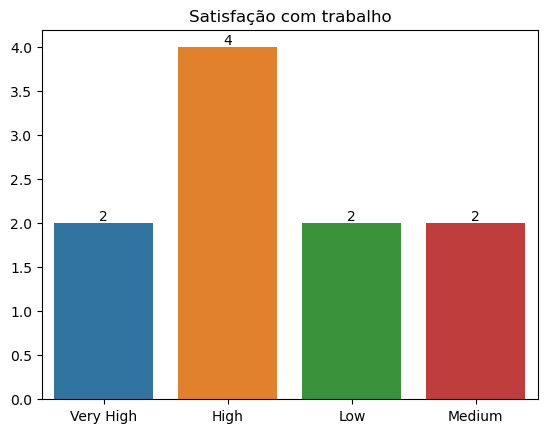

In [73]:
figMD_att2=sns.countplot(data=MD_att,x=MD_att['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
figMD_att2.set_title("Satisfação com trabalho")
figMD_att2.set_ylabel("")
figMD_att2.set_xlabel("")
figMD_att2.bar_label(figMD_att2.containers[0]);

**A maioria apresentou satisfação de boa para média, havendo apenas 2 casos de baixa satisfação**

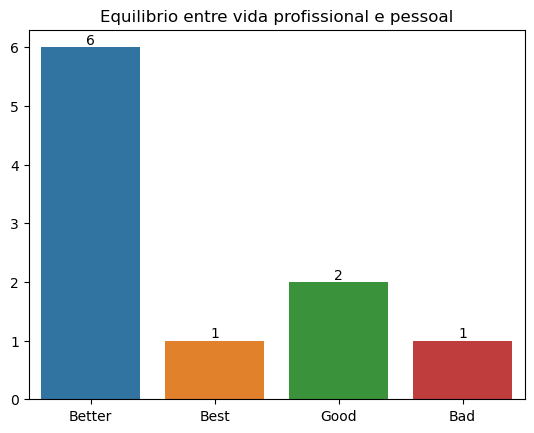

In [74]:
figMD_att2=sns.countplot(data=MD_att,x=MD_att['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
figMD_att2.set_title("Equilibrio entre vida profissional e pessoal")
figMD_att2.set_ylabel("")
figMD_att2.set_xlabel("")
figMD_att2.bar_label(figMD_att2.containers[0]);

**No geral, a maioria apresentou um bom equilibrio entre trabalho e vida pessoal**

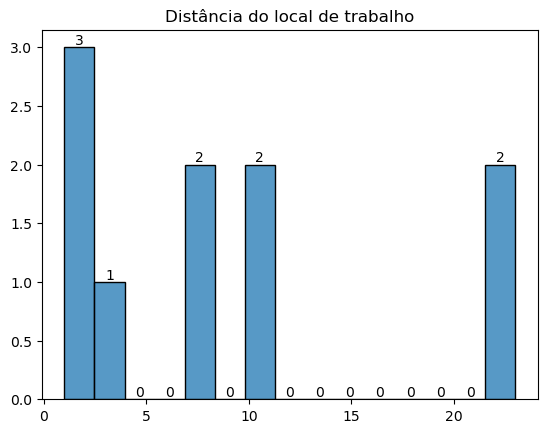

In [75]:
figMD_att3=sns.histplot(data=MD_att,x=MD_att['DistanceFromHome'],bins=15)
figMD_att3.set_title("Distância do local de trabalho")
figMD_att3.set_ylabel("")
figMD_att3.set_xlabel("")
figMD_att3.bar_label(figMD_att3.containers[1]);

**No geral, a maioria se situava próxima do trabalho, havendo 2 casos de funcionários distantes de seu local de trabalho**

#### Analisando saídas no cargo 'Healthcare Representative' (Representante de saúde)




In [76]:
HTR_att=file.query("JobRole=='Healthcare Representative' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','Age','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]


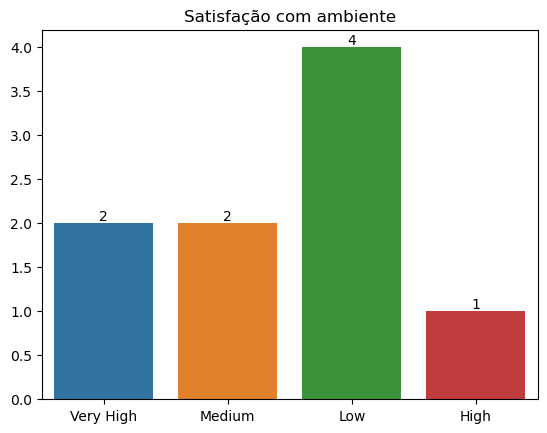

In [77]:
figHTR_att1=sns.countplot(data=HTR_att,x=HTR_att['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
figHTR_att1.set_title("Satisfação com ambiente")
figHTR_att1.set_ylabel("")
figHTR_att1.set_xlabel("")
figHTR_att1.bar_label(figHTR_att1.containers[0]);


**66% apresentou baixa/média satisfação com ambiente** 

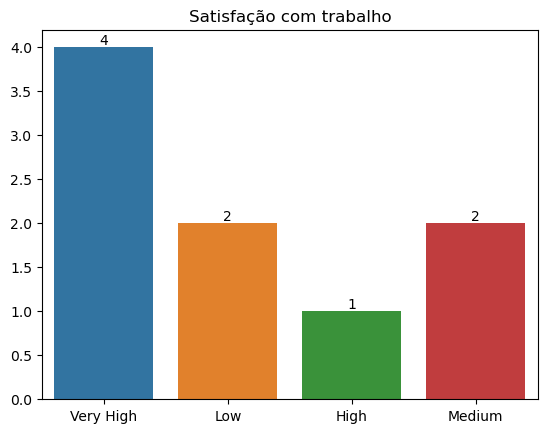

In [78]:
figHTR_att2=sns.countplot(data=HTR_att,x=HTR_att['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
figHTR_att2.set_title("Satisfação com trabalho")
figHTR_att2.set_ylabel("")
figHTR_att2.set_xlabel("")
figHTR_att2.bar_label(figHTR_att2.containers[0]);

**Satisfação com o trabalho se mostrou boa/mediana em maioria**

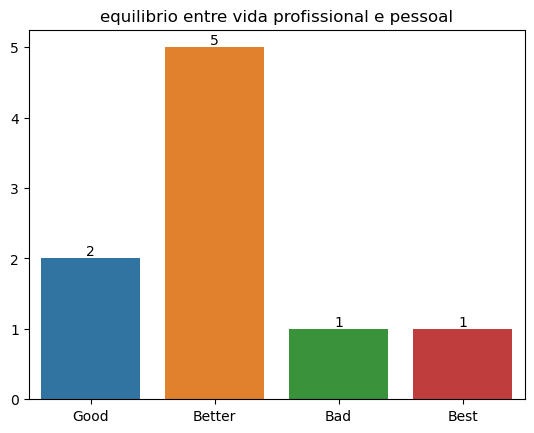

In [79]:
figHTR_att3=sns.countplot(data=HTR_att,x=HTR_att['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
figHTR_att3.set_title("equilibrio entre vida profissional e pessoal")
figHTR_att3.set_ylabel("")
figHTR_att3.set_xlabel("")
figHTR_att3.bar_label(figHTR_att3.containers[0]);

**Cerca de 77% apresentou um equilibrio bom**

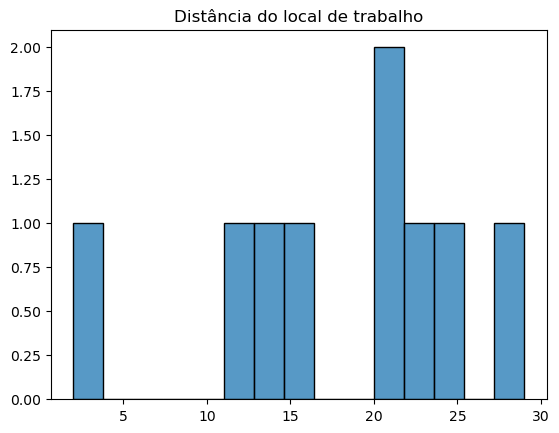

In [80]:
figHTR_att4=sns.histplot(data=HTR_att,x=HTR_att['DistanceFromHome'],bins=15)
figHTR_att4.set_title("Distância do local de trabalho")
figHTR_att4.set_ylabel("")
figHTR_att4.set_xlabel("")
figHTR_att4.bar_label(figHTR_att4.containers[0]);

**Cerca de 80% apresentou distancia do trabalho maior que 12, sendo considerado longe**

### Analisando saídas no cargo 'Manager' (Gerente)

In [81]:
Manager_Att=file.query("JobRole=='Manager' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]


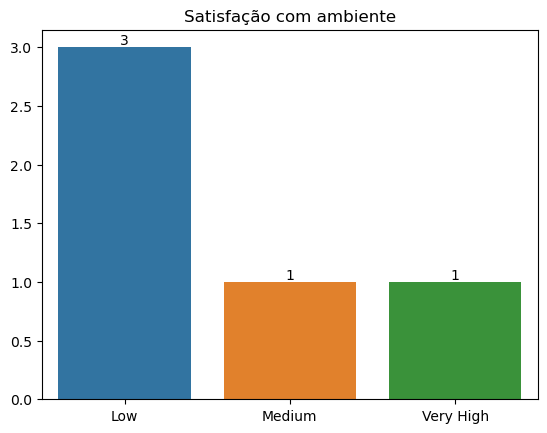

In [82]:
fig_ManagerAtt=sns.countplot(data=Manager_Att,x=Manager_Att['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig_ManagerAtt.set_title("Satisfação com ambiente")
fig_ManagerAtt.set_ylabel("")
fig_ManagerAtt.set_xlabel("")
fig_ManagerAtt.bar_label(fig_ManagerAtt.containers[0]);

**Dos 5 funcionários, 3 apresentaram baixa satisfação com ambiente**

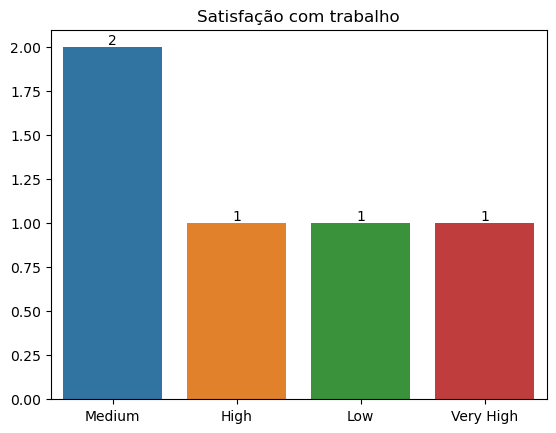

In [83]:
fig_ManagerAtt2=sns.countplot(data=Manager_Att,x=Manager_Att['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
fig_ManagerAtt2.set_title("Satisfação com trabalho")
fig_ManagerAtt2.set_ylabel("")
fig_ManagerAtt2.set_xlabel("")
fig_ManagerAtt2.bar_label(fig_ManagerAtt2.containers[0]);

**No geral, a satisfação com o cargo mostrou-se média/alta**

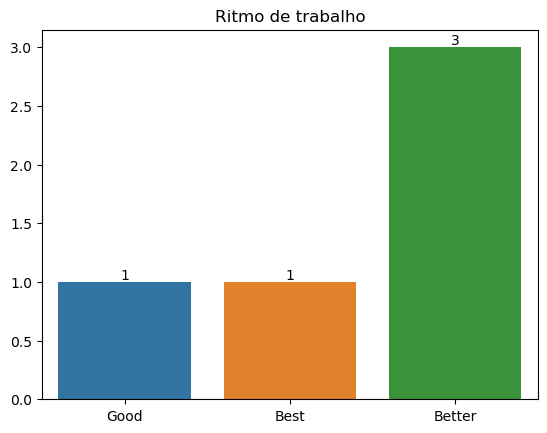

In [84]:
fig_ManagerAtt3=sns.countplot(data=Manager_Att,x=Manager_Att['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
fig_ManagerAtt3.set_title("Ritmo de trabalho")
fig_ManagerAtt3.set_ylabel("")
fig_ManagerAtt3.set_xlabel("")
fig_ManagerAtt3.bar_label(fig_ManagerAtt3.containers[0]);

**dos 5 funcionários, 3 mostraram niveis de satisfação bons com o ritmo de trabalho**

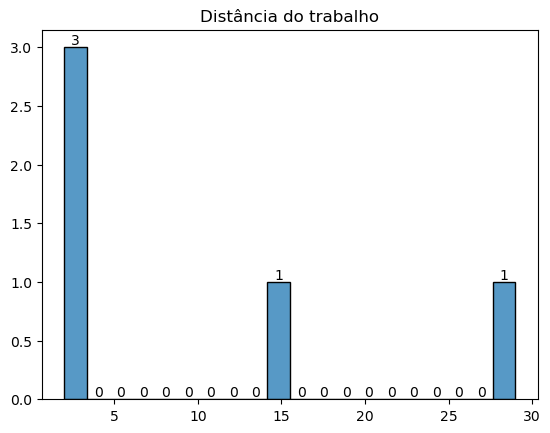

In [85]:
fig_ManagerAtt4=sns.histplot(data=Manager_Att,x=Manager_Att['DistanceFromHome'],bins=20)
fig_ManagerAtt4.set_title("Distância do trabalho")
fig_ManagerAtt4.set_ylabel("")
fig_ManagerAtt4.set_xlabel("")
fig_ManagerAtt4.bar_label(fig_ManagerAtt4.containers[1]);

**Apenas 1 funcionario se situava longe do local de trabalho**

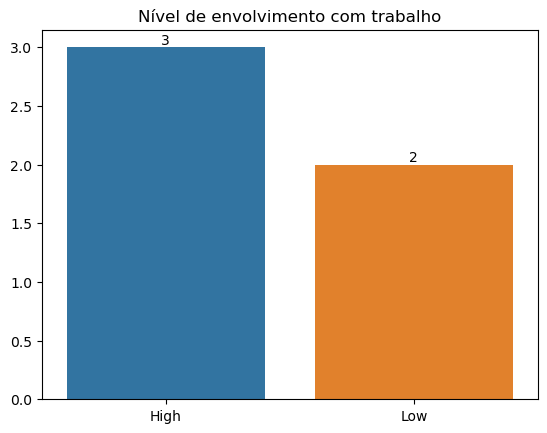

In [86]:
fig_ManagerAtt5=sns.countplot(data=Manager_Att,x=Manager_Att['JobInvolvement'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig_ManagerAtt5.set_title("Nível de envolvimento com trabalho")
fig_ManagerAtt5.set_ylabel("")
fig_ManagerAtt5.set_xlabel("")
fig_ManagerAtt5.bar_label(fig_ManagerAtt5.containers[0]);

**Dos 5 funcionários, 2 apresentaram baixo envolvimento com o trabalho**

### Analisando saidas no cargo 'Lab technician' (Técnico de laboratório)

In [87]:
lab_tech_attrition=file.query("JobRole=='Laboratory Technician' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','WorkLifeBalance','EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]
lab_tech_attrition

,DistanceFromHome,JobInvolvement,WorkLifeBalance,EnvironmentSatisfaction,RelationshipSatisfaction,JobSatisfaction,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,2,2,3,4,2,3,0,0,0
14,24,2,3,3,2,3,2,0,3
42,25,1,2,1,3,3,0,0,1
50,1,2,3,1,4,3,0,0,0
51,5,3,2,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...
1273,8,3,3,3,3,1,0,0,0
1290,9,3,2,4,3,1,1,0,7
1354,24,3,3,1,4,4,2,1,0
1390,17,2,2,3,1,4,1,0,3


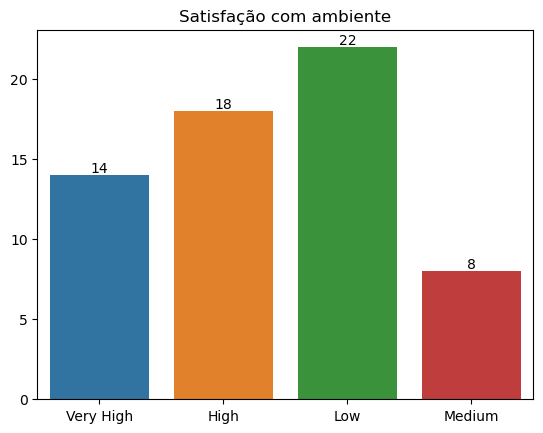

In [88]:
fig6_1=sns.countplot(data=lab_tech_attrition,x=lab_tech_attrition['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig6_1.set_title("Satisfação com ambiente")
fig6_1.set_ylabel("")
fig6_1.set_xlabel("")
fig6_1.bar_label(fig6_1.containers[0]);


**Cerca de 35% apresentou instatisfação com ambiente e 14% mostrou uma satisfação média**

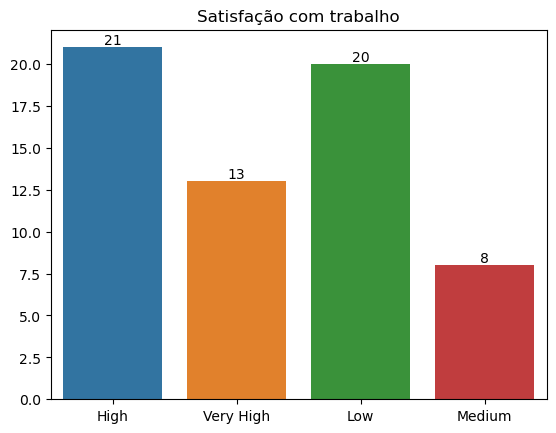

In [89]:
fig6_2=sns.countplot(data=lab_tech_attrition,x=lab_tech_attrition['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
fig6_2.set_title("Satisfação com trabalho")
fig6_2.set_ylabel("")
fig6_2.set_xlabel("")
fig6_2.bar_label(fig6_2.containers[0]);

**No geral, mais da metade mostrou estar satisfeita com o cargo, mas 32% apresentou insatisfação com o trabalho e 13% satisfação média**

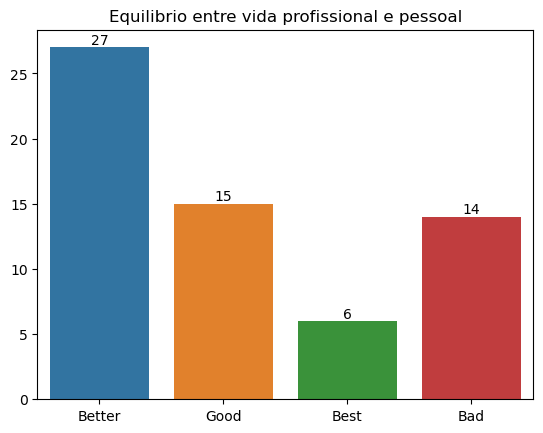

In [90]:
fig6_3=sns.countplot(data=lab_tech_attrition,x=lab_tech_attrition['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
fig6_3.set_title("Equilibrio entre vida profissional e pessoal")
fig6_3.set_ylabel("")
fig6_3.set_xlabel("")
fig6_3.bar_label(fig6_3.containers[0]);

**22% apresentou desequlibrio entre vida prosifssional e pessoal**

#### Distância do trabalho

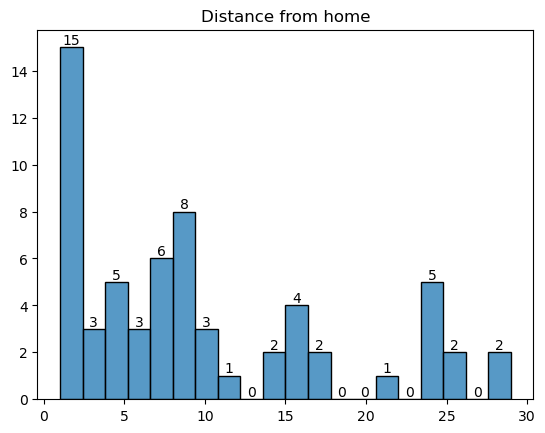

In [91]:
fig6_4=sns.histplot(data=lab_tech_attrition,x=lab_tech_attrition['DistanceFromHome'],bins=20)
fig6_4.set_title("Distance from home")
fig6_4.set_ylabel("")
fig6_4.set_xlabel("")
fig6_4.bar_label(fig6_4.containers[1]);

**Cerca de 66% mora proximo/medio do local de trabalho**

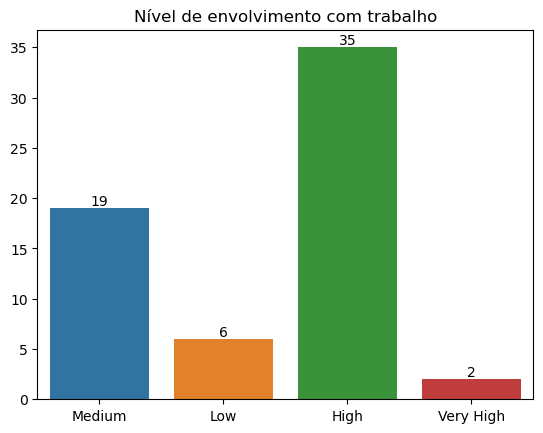

In [92]:
fig6_6=sns.countplot(data=lab_tech_attrition,x=lab_tech_attrition['JobInvolvement'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig6_6.set_title("Nível de envolvimento com trabalho")
fig6_6.set_ylabel("")
fig6_6.set_xlabel("")
fig6_6.bar_label(fig6_6.containers[0]);

**Cerca de 60% dos funcionários mostraram envolvimento alto com o trabalho, enquanto que 10% apresentou baixo envolvimento**

### Analisando saidas no cargo 'Sales Representative' (Representante de vendas)

In [122]:
salesrep_att=file.query("JobRole=='Sales Representative' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]


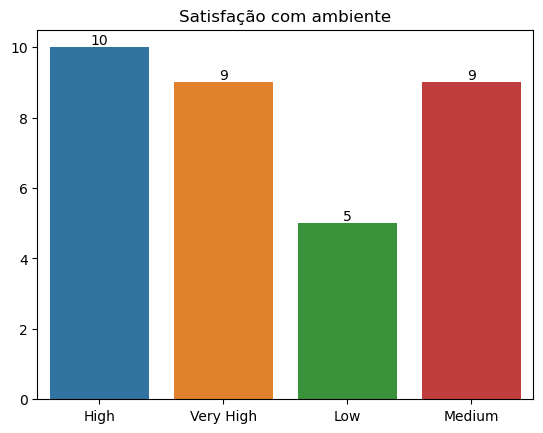

In [94]:
fig6_5=sns.countplot(data=salesrep_att,x=salesrep_att['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig6_5.set_title("Satisfação com ambiente")
fig6_5.set_ylabel("")
fig6_5.set_xlabel("")
fig6_5.bar_label(fig6_5.containers[0]);

**57% dos funcionários mostraram satisfação alta/muito alta, apenas 15% mostrou estar insatisfeito**

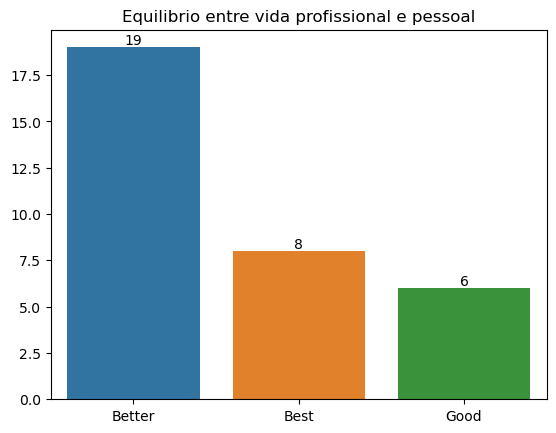

In [95]:
fig6_5=sns.countplot(data=salesrep_att,x=salesrep_att['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
fig6_5.set_title("Equilibrio entre vida profissional e pessoal")
fig6_5.set_ylabel("")
fig6_5.set_xlabel("")
fig6_5.bar_label(fig6_5.containers[0]);

**No geral, os funcionários apresentaram um equilíbrio bom**

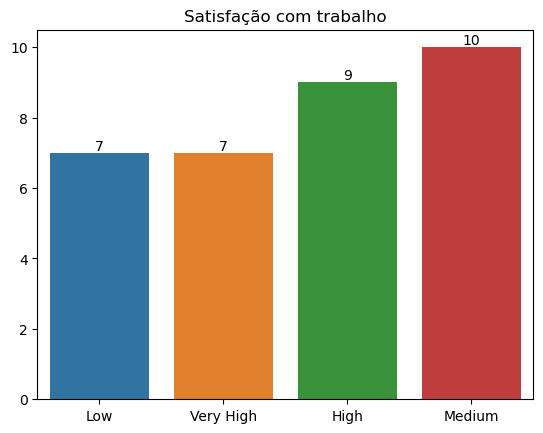

In [96]:
fig6_6=sns.countplot(data=salesrep_att,x=salesrep_att['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
fig6_6.set_title("Satisfação com trabalho")
fig6_6.set_ylabel("")
fig6_6.set_xlabel("")
fig6_6.bar_label(fig6_6.containers[0]);

**30% apresentou satisfação media com o cargo, enquanto que 21% mostrou insatisfação**

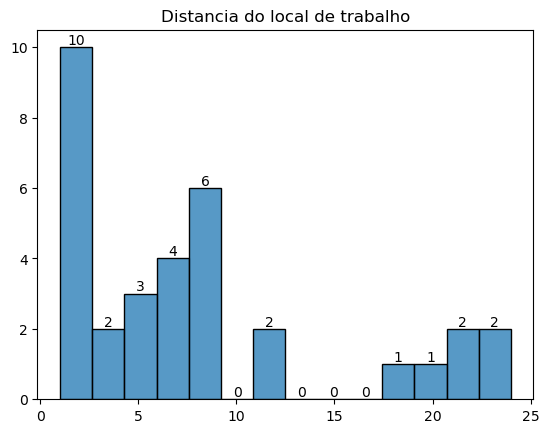

In [97]:
fig6_7=sns.histplot(data=salesrep_att,x=salesrep_att['DistanceFromHome'],bins=14)
fig6_7.set_title("Distancia do local de trabalho")
fig6_7.set_ylabel("")
fig6_7.set_xlabel("")
fig6_7.bar_label(fig6_7.containers[1]);

**No geral, apenas 12% dos funcionários se situava longe do local de trabalho**

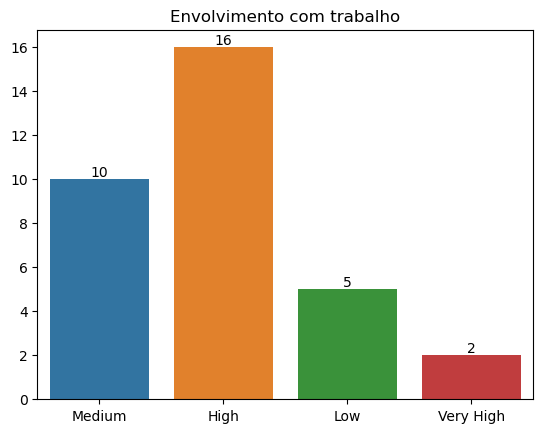

In [98]:
fig6_8=sns.countplot(data=salesrep_att,x=salesrep_att['JobInvolvement'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig6_8.set_title("Envolvimento com trabalho")
fig6_8.set_ylabel("")
fig6_8.set_xlabel("")
fig6_8.bar_label(fig6_8.containers[0]);

**54% dos funcionários mostraram alto envolvimento com o trabalho, enquanto que apenas 15% mostraram baixo envolvimento**

### Sales executive apresentou maior número de saidas e possuia uma média salarial baixa. Analisando outros possiveis fatores:

In [123]:
salesexc_att=file.query("JobRole=='Sales Executive' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]

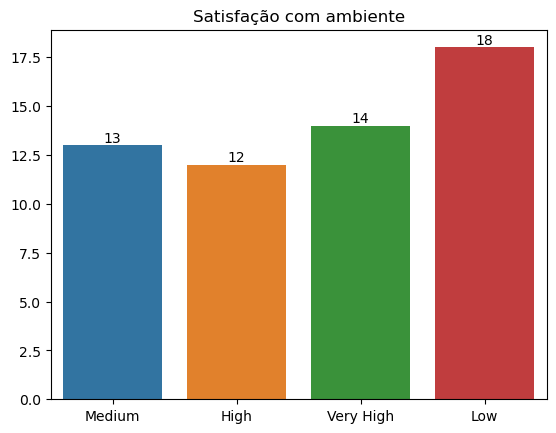

In [100]:
fig6_8=sns.countplot(data=salesexc_att,x=salesexc_att['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig6_8.set_title("Satisfação com ambiente")
fig6_8.set_ylabel("")
fig6_8.set_xlabel("")
fig6_8.bar_label(fig6_8.containers[0]);

**31% desses funcionários apresentaram insatisfação com o ambiente de trabalho, enquanto que 22% dos funcionários mostraram uma satisfação mediana**

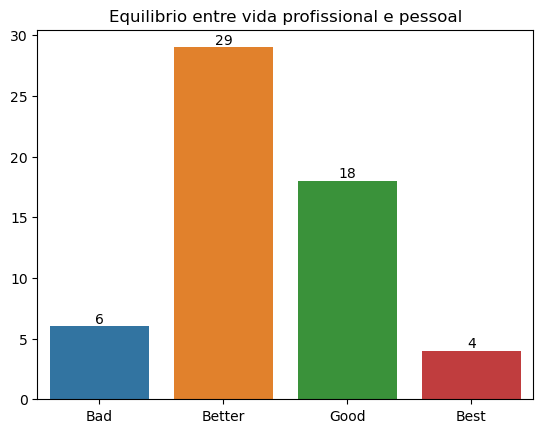

In [101]:
fig6_9=sns.countplot(data=salesexc_att,x=salesexc_att['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
fig6_9.set_title("Equilibrio entre vida profissional e pessoal")
fig6_9.set_ylabel("")
fig6_9.set_xlabel("")
fig6_9.bar_label(fig6_9.containers[0]);

**Cerca de 50% mostrou um equilibrio bom, e 10% apresentou ter problemas de conciliar vida pessoal e profissional**

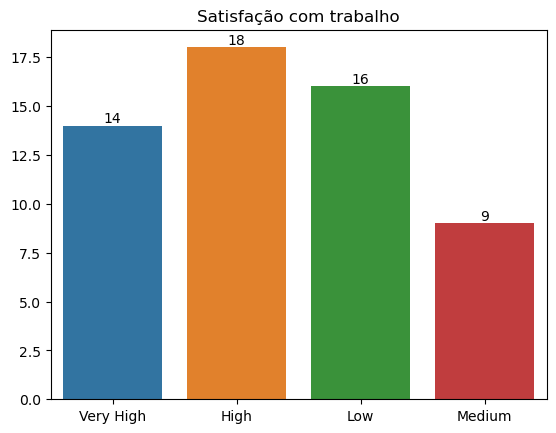

In [102]:
fig7=sns.countplot(data=salesexc_att,x=salesexc_att['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
fig7.set_title("Satisfação com trabalho")
fig7.set_ylabel("")
fig7.set_xlabel("")
fig7.bar_label(fig7.containers[0]);

**28% dos funcionários apresentaram insatisfação com o cargo e 15% mostrou média satisfação**

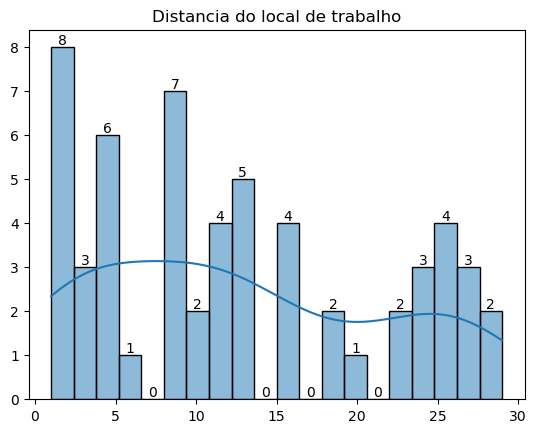

In [103]:
fig7_1=sns.histplot(data=salesexc_att,x=salesexc_att['DistanceFromHome'],bins=20,kde=True)
fig7_1.set_title("Distancia do local de trabalho")
fig7_1.set_ylabel("")
fig7_1.set_xlabel("")
fig7_1.bar_label(fig7_1.containers[1]);

**Cerca de 30% dos funcionários se situavam longe do local de trabalho**

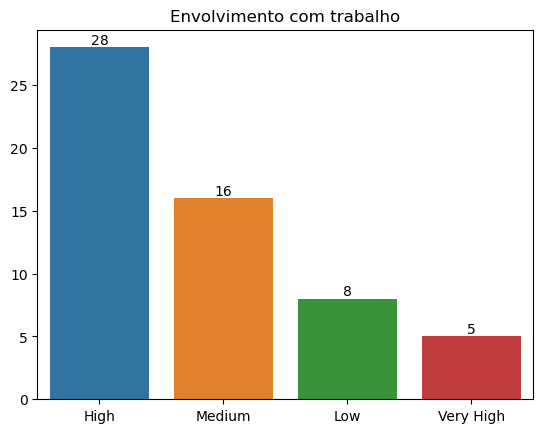

In [105]:
fig7_2=sns.countplot(data=salesexc_att,x=salesexc_att['JobInvolvement'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
fig7_2.set_title("Envolvimento com trabalho")
fig7_2.set_ylabel("")
fig7_2.set_xlabel("")
fig7_2.bar_label(fig7_2.containers[0]);

**Cerca de 58% dos funcionários apresentaram alto envolvimento com o trabalho,enquanto que 14% mostrou baixo envolvimento**

### Analisando saidas no cargo 'Research Scientist' (Cientista pesquisador)

In [119]:
research_scient=file.query("JobRole=='Research Scientist' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]

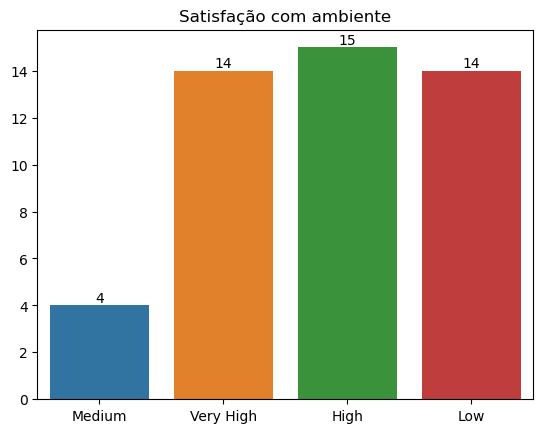

In [107]:
fig8=sns.countplot(data=research_scient,x=research_scient['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig8.set_title("Satisfação com ambiente")
fig8.set_ylabel("")
fig8.set_xlabel("")
fig8.bar_label(fig8.containers[0]);

**Cerca de 40% apresentou baixa satisfação com o ambiente**

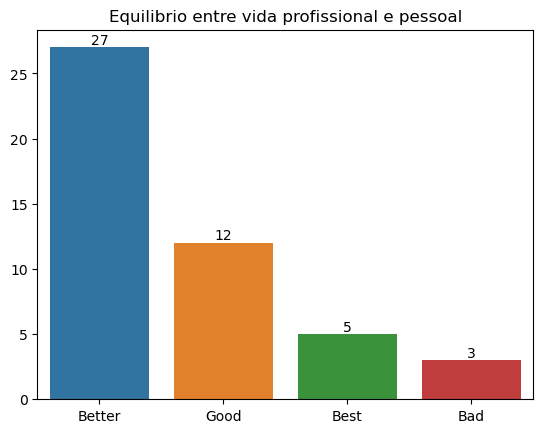

In [108]:
fig8_1=sns.countplot(data=research_scient,x=research_scient['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
fig8_1.set_title("Equilibrio entre vida profissional e pessoal")
fig8_1.set_ylabel("")
fig8_1.set_xlabel("")
fig8_1.bar_label(fig8_1.containers[0]);

**Cerca de 60% apresentou um equilibrio bom**

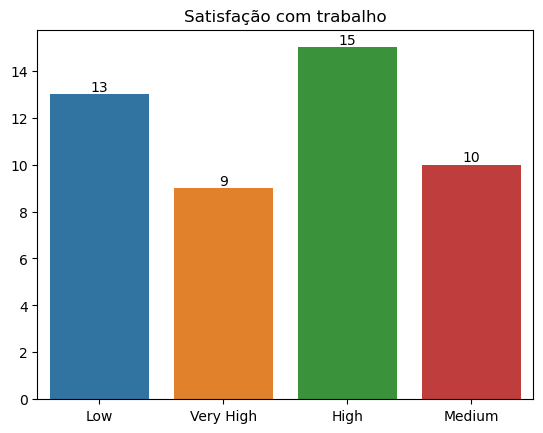

In [109]:
fig8_2=sns.countplot(data=research_scient,x=research_scient['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
fig8_2.set_title("Satisfação com trabalho")
fig8_2.set_ylabel("")
fig8_2.set_xlabel("")
fig8_2.bar_label(fig8_2.containers[0]);

**Cerca de 51% apresentou satisfação alta com cargo, enquanto que 27% mostrou insatisfação**

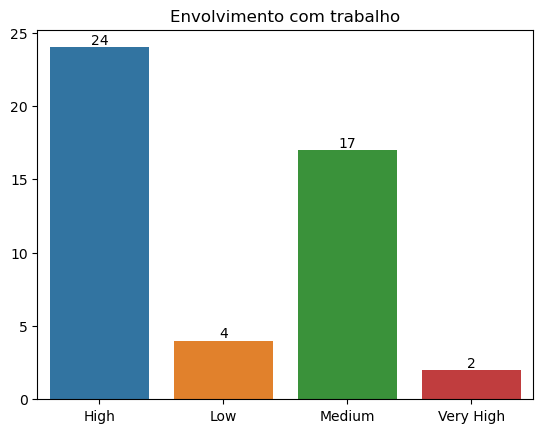

In [110]:
fig8_3=sns.countplot(data=research_scient,x=research_scient['JobInvolvement'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
fig8_3.set_title("Envolvimento com trabalho")
fig8_3.set_ylabel("")
fig8_3.set_xlabel("")
fig8_3.bar_label(fig8_3.containers[0]);

**Cerca de 36% apresentou envolvimento mediano, e apenas 8,5% mostrou pouco envolvimento**

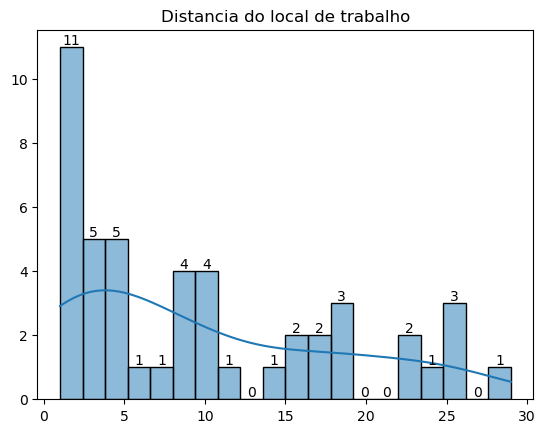

In [111]:
fig8_4=sns.histplot(data=research_scient,x=research_scient['DistanceFromHome'],bins=20,kde=True)
fig8_4.set_title("Distancia do local de trabalho")
fig8_4.set_ylabel("")
fig8_4.set_xlabel("")
fig8_4.bar_label(fig8_4.containers[1]);

**No geral, cerca de 65% dos funcionários morava proximo/medio do local de trabalho**

### Analisando saidas no cargo: 'Human Resources' (Recursos humanos)

In [121]:
HR_att=file.query("JobRole=='Human Resources' and Attrition=='Yes'")[['DistanceFromHome','JobInvolvement','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction', 'JobSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]


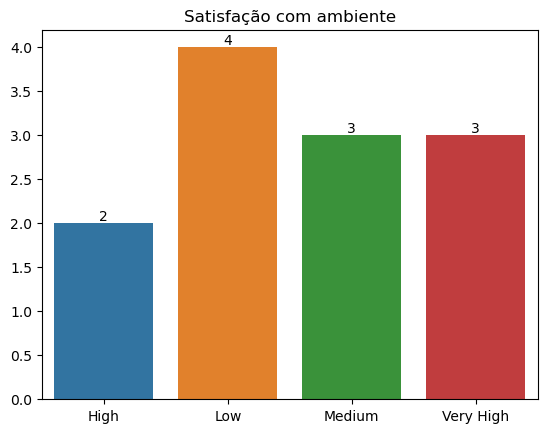

In [113]:
figHR=sns.countplot(data=HR_att,x=HR_att['EnvironmentSatisfaction'].replace({1:'Low',
2:'Medium',
3:'High',
4:'Very High'}))
figHR.set_title("Satisfação com ambiente")
figHR.set_ylabel("")
figHR.set_xlabel("")
figHR.bar_label(figHR.containers[0]);

**58% apresentou satisfação baixa/média com o ambiente**

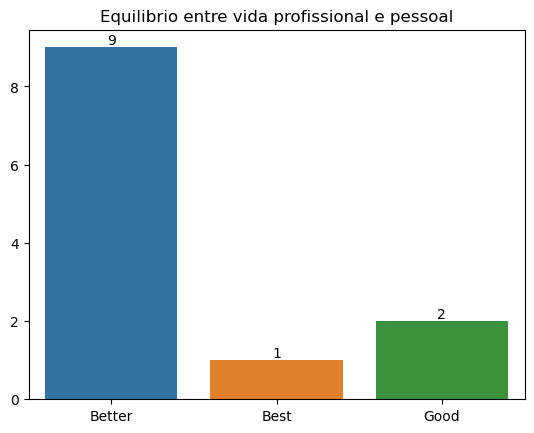

In [114]:
figHR2=sns.countplot(data=HR_att,x=HR_att['WorkLifeBalance'].replace({1:'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}))
figHR2.set_title("Equilibrio entre vida profissional e pessoal")
figHR2.set_ylabel("")
figHR2.set_xlabel("")
figHR2.bar_label(figHR2.containers[0]);

**No geral, não foram encontrados problemas em equilibrar vida profissional e pessoal**

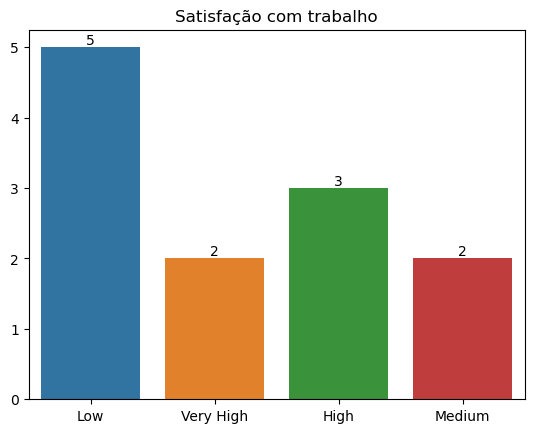

In [115]:
figHR3=sns.countplot(data=HR_att,x=HR_att['JobSatisfaction'].replace({1:'Low',
2: 'Medium',
3 :'High',
4 :'Very High'}))
figHR3.set_title("Satisfação com trabalho")
figHR3.set_ylabel("")
figHR3.set_xlabel("")
figHR3.bar_label(figHR3.containers[0]);

**41% apresentou insatisfação com o cargo**

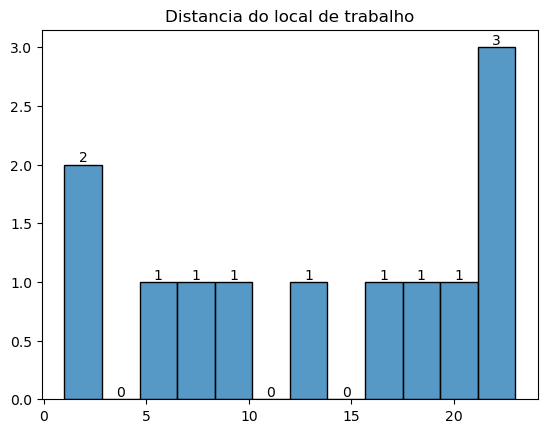

In [116]:
figHR4=sns.histplot(data=HR_att,x=HR_att['DistanceFromHome'],bins=12)
figHR4.set_title("Distancia do local de trabalho")
figHR4.set_ylabel("")
figHR4.set_xlabel("")
figHR4.bar_label(figHR4.containers[1]);

**Cerca de 41% dos funcionários se situavam longe do local de trabalho**